In [86]:
from cw_analysis import calculate_ppc, process_multiple_ppc, make_array, normal_distribution_tests, find_best_mean, find_best_median, top_n_medians

import matplotlib.pyplot as plt
import numpy as np
import csv
import math
import random

import pandas as pd
from matplotlib import style
from matplotlib.pyplot import cm
import matplotlib.collections as mcoll

import seaborn as sns
from scipy.stats import kurtosis, skew
from scipy import stats
import statistics

In [60]:
%load_ext autoreload
%autoreload 2

%reload_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


<Figure size 1080x864 with 0 Axes>

<Figure size 1080x864 with 0 Axes>

<Figure size 1080x864 with 0 Axes>

<Figure size 1080x864 with 0 Axes>

<Figure size 1080x864 with 0 Axes>

<Figure size 1080x864 with 0 Axes>

<Figure size 1080x864 with 0 Axes>

<Figure size 1080x864 with 0 Axes>

<Figure size 1080x864 with 0 Axes>

<Figure size 1080x864 with 0 Axes>

# 3 Day Trials

## All results

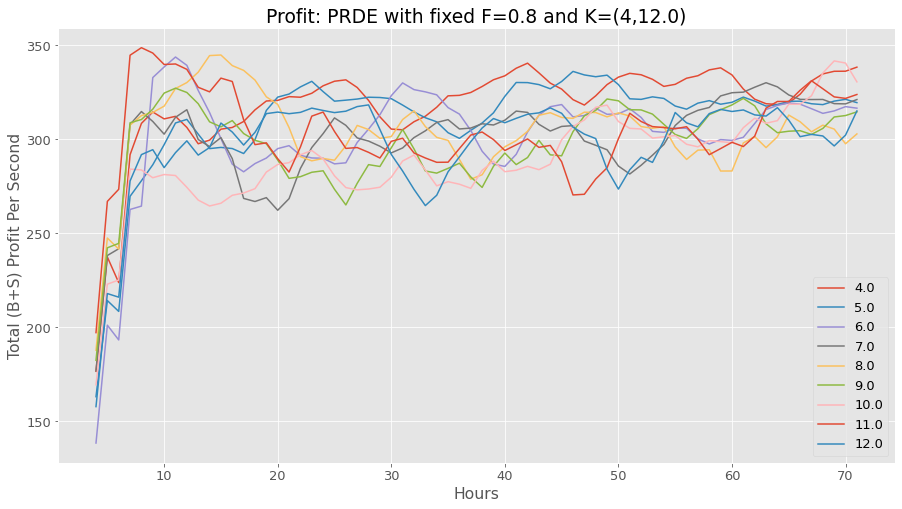

In [69]:
el_all_sma_set_f_3d = process_multiple_ppc('perfect_elastic/set_f0.8_3d/set_f0.8_k%d',4,13,1,
                                      'perfect_elastic/set_f0.8_3d/figures/set_f0.8_3d.png', 
                                      'Profit: PRDE with fixed F=0.8 and K=')

In [75]:
el_all_sma_set_f_3d = make_array(el_all_sma_set_f_3d)

In [53]:
# import statsmodels.api as sm
# import matplotlib.pyplot as plt

# #create Q-Q plot with 45-degree line added to plot

# for x in range(len(el_all_sma_set_f_3d)):
#     sm.qqplot(el_all_sma_set_f_3d[x], line='45')

### Distribution Analysis 

C:\Users\linda\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


skewness of normal distribution (should be 0): -3.334129222283089
shapiro of normal distribution (p should be > 0.5):4.344373117677472e-15

skewness of normal distribution (should be 0): -3.2186605616221153
shapiro of normal distribution (p should be > 0.5):8.247630958182692e-15

skewness of normal distribution (should be 0): -3.0627388409558276
shapiro of normal distribution (p should be > 0.5):5.113886541335301e-14

skewness of normal distribution (should be 0): -3.3098231342757027
shapiro of normal distribution (p should be > 0.5):1.6966098732623842e-14

skewness of normal distribution (should be 0): -3.353213970936022
shapiro of normal distribution (p should be > 0.5):1.5526762750408922e-14

skewness of normal distribution (should be 0): -3.354312846268493
shapiro of normal distribution (p should be > 0.5):1.5093661251950642e-14

skewness of normal distribution (should be 0): -3.1474206506251217
shapiro of normal distribution (p should be > 0.5):1.2102604617265922e-13

skewness of 

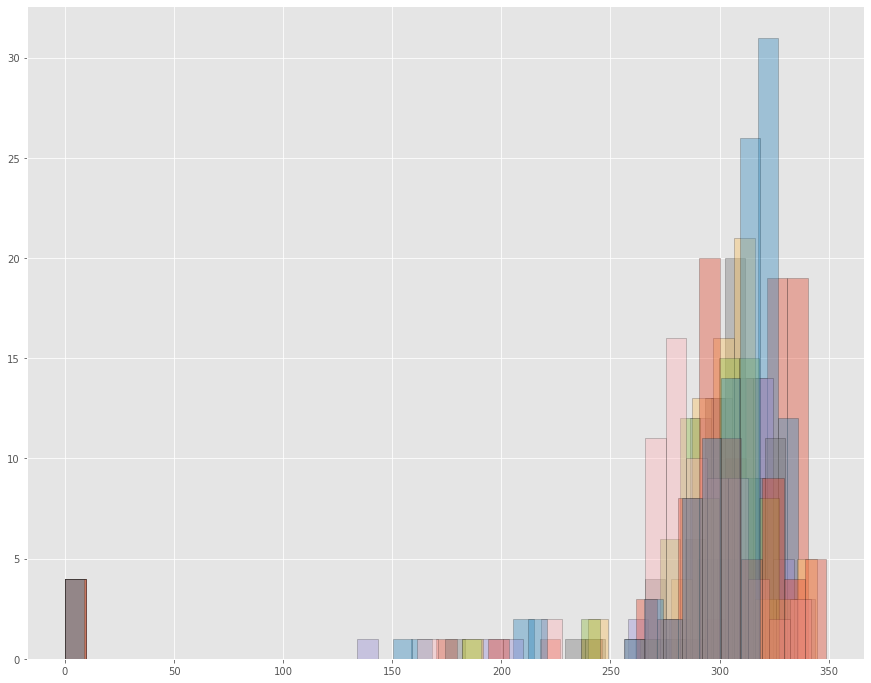

In [61]:
normal_distribution_tests(el_all_sma_set_f_3d, False)

No handles with labels found to put in legend.


[0            NaN
1            NaN
2            NaN
3            NaN
4     176.659656
         ...    
67    331.051689
68    334.818603
69    336.214944
70    336.262530
71    338.420075
Name: 0, Length: 72, dtype: float64]


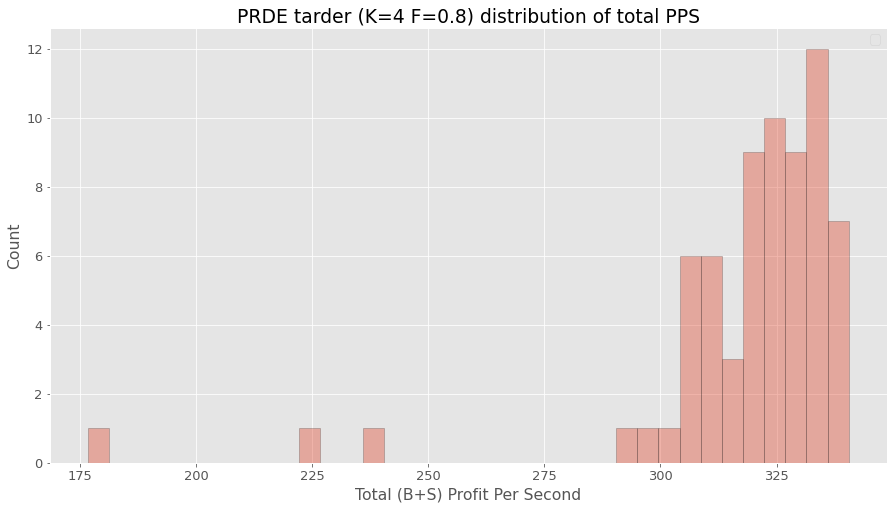

In [72]:
# normal_distribution_tests(el_all_sma_set_f_3d[0:1], False)
sns.distplot(el_all_sma_set_f_3d[0:1], hist=True, kde=False, bins=int(180/5), hist_kws={'edgecolor':'black'})
plt.title("PRDE tarder (K=4 F=0.8) distribution of total PPS")
plt.ylabel("Count")
plt.xlabel("Total (B+S) Profit Per Second")
plt.legend(loc='best')

print(el_all_sma_set_f_3d[0:1])

### Mean Analysis 


No handles with labels found to put in legend.


[300.40622964444447, 293.5210390111111, 284.8134152999999, 283.8656155416666, 286.43081292222223, 281.18891838888885, 273.30837951388884, 287.06696504722225, 281.0434808555556]
4 300.40622964444447


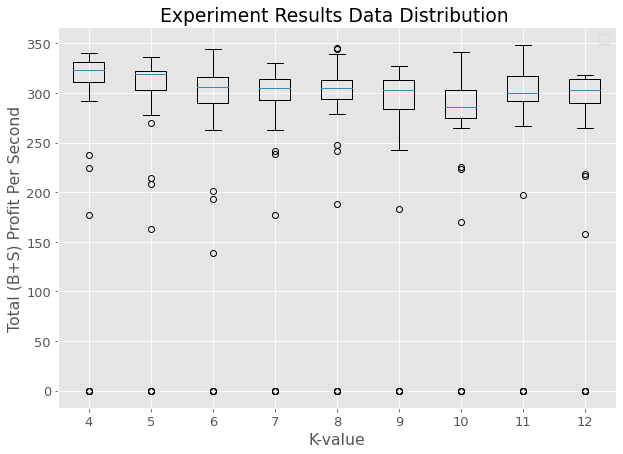

In [82]:
find_best_mean(el_all_sma_set_f_3d, 4)

fig = plt.figure(figsize =(10, 7))
plt.boxplot(el_all_sma_set_f_3d)
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9], [4, 5, 6, 7, 8, 9, 10, 11, 12])
plt.title("Experiment Results Data Distribution ")
plt.ylabel("Total (B+S) Profit Per Second")
plt.xlabel("K-value")
plt.legend(loc='best')
plt.show()

4 322.9491127
[322.9491127, 319.1188867000001, 305.68783699999994, 305.0493515999999, 304.7386905000001, 302.6155171999999, 286.1668222999999, 299.9892485, 302.7389461]


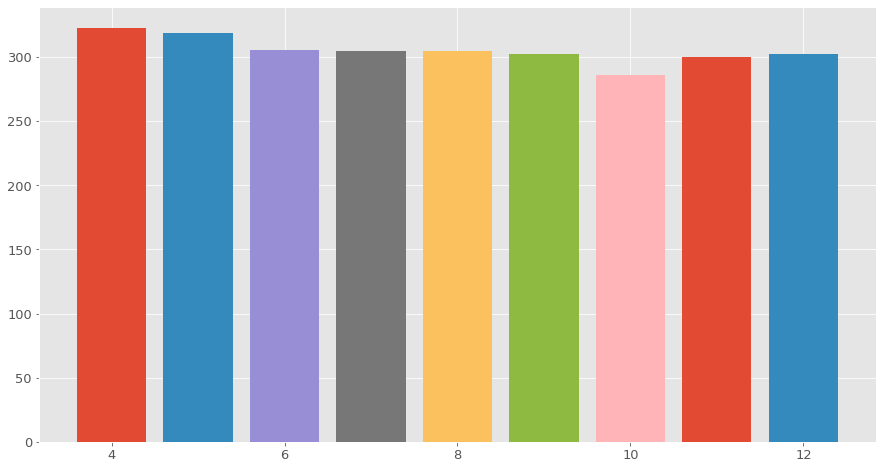

In [83]:
medians = find_best_median(el_all_sma_set_f_3d, 4)
print(medians)

In [84]:
top_n_medians(medians, 3)

0 322.9491127
1 319.1188867000001
2 305.68783699999994


[[0, 322.9491127], [1, 319.1188867000001], [2, 305.68783699999994]]

### Kruskal-Wallis 

In [77]:
k, p = stats.kruskal(el_all_sma_set_f_3d[0], el_all_sma_set_f_3d[1], el_all_sma_set_f_3d[2], el_all_sma_set_f_3d[3], el_all_sma_set_f_3d[4] , el_all_sma_set_f_3d[5],  el_all_sma_set_f_3d[6], el_all_sma_set_f_3d[7])
print(p)
print(format(p, '.22f'))

5.100799233598305e-17
0.0000000000000000510080


In [128]:
import scikit_posthocs as sp
data = [el_all_sma_set_f_3d[0], el_all_sma_set_f_3d[1], el_all_sma_set_f_3d[2]]
sp.posthoc_dunn(data, p_adjust = 'bonferroni')

,1,2,3
1,1.000000e+00,0.061412,3.412060e-07
2,6.141242e-02,1.000000,8.488371e-03
3,3.412060e-07,0.008488,1.000000e+00


### Mann-whitney 

In [129]:
from scipy.stats import norm
from scipy.stats import mannwhitneyu

res, p = mannwhitneyu(el_all_sma_set_f_3d[0], el_all_sma_set_f_3d[1])
print(format(p, '.11f'))

0.00331188672


## Individual Trials 

### 3 day K=5 F=1.8

In [47]:
# total = process_multiple_ppc('perfect_elastic/3d_set_f1.8_k5_trail',4,5,1,
#                                       'set_k/figures/total_all_f.png', 
#                                       'Profit: PRDE with fixed K=5 and F=1.8')

# calculate_ppc('perfect_elastic/3d_set_f1.8_k5_trail', 5, "(Unit Elastic) Profit: PRDE with fixed F=0.8 and K=", True)
# np.mean(total[0])

# 3 day changing F for K=[4,5,12]

## K = 4 

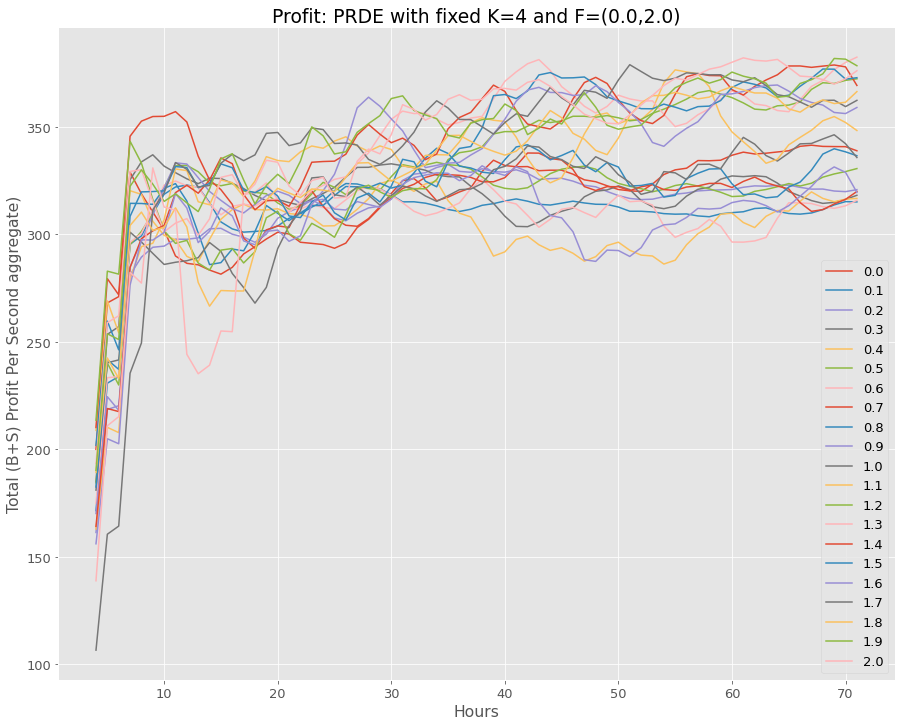

In [12]:
total_k4 = process_multiple_ppc('perfect_elastic/set_kbest_3d/set_k4_f%01.1f',0.0,2.1,0.1,
                                      'perfect_elastic/set_kbest_3d/figures/set_k4.png', 
                                      'Profit: PRDE with fixed K=4 and F=')

In [37]:
total_k4 = make_array(total_k4)

In [38]:
find_best_mean(total, 0)

[298.048740086111, 290.8562752972223, 293.65086112222224, 299.515315638889, 285.92915516111105, 300.871086675, 290.52757153888894, 302.1713945777778, 301.2576803805556, 292.6995181277778, 298.0645377194445, 314.8948437638889, 313.84429933333337, 323.92535950277784, 322.9045193833333, 320.9638628638889, 315.20640059166675, 322.38915044722216, 312.61375219166683, 326.38184931111107, 319.1514389722222]
19 326.38184931111107


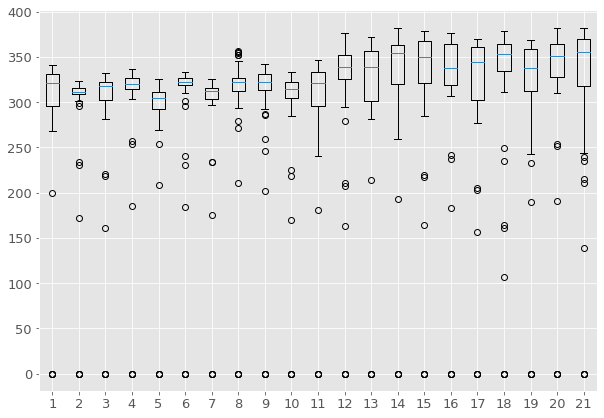

In [39]:
fig = plt.figure(figsize =(10, 7))
plt.boxplot(total_k4)
plt.show()

20 355.7259547
20 355.7259547


[321.26940749999994,
 311.6782519,
 318.4018987,
 320.0286443000001,
 304.80085399999996,
 322.2975521000001,
 312.4778831,
 321.9520755,
 322.41153410000004,
 314.1893348,
 321.67736890000015,
 338.59367740000005,
 338.435644,
 353.8499585000001,
 349.6241422,
 337.48306650000006,
 344.23083510000004,
 352.7279359999999,
 337.89395060000015,
 351.09302349999996,
 355.7259547]

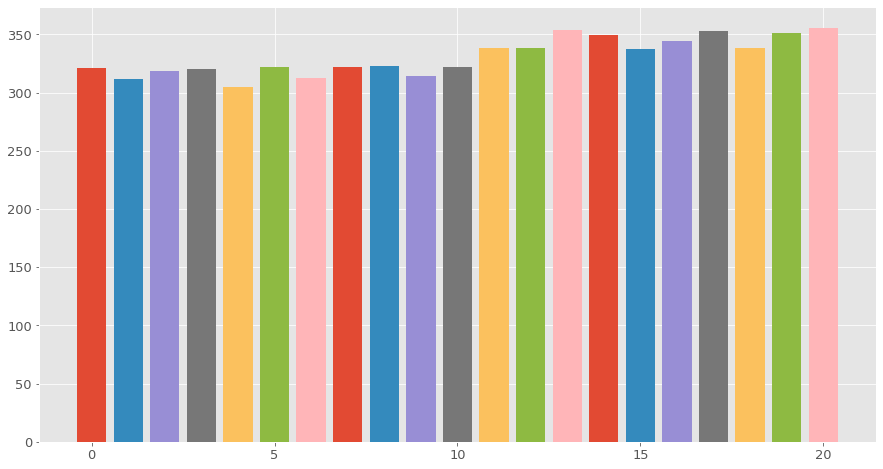

In [145]:
medians_k4 = find_best_median(total_k4, 0)
find_best_median(total_k4, 0)

In [130]:
top_n_medians(medians_k4, 3) 

20 355.7259547
13 353.8499585000001
17 352.7279359999999


[[20, 355.7259547], [13, 353.8499585000001], [17, 352.7279359999999]]

In [131]:
k, p = stats.kruskal(total_k4[0], total_k4[1], total_k4[2], total_k4[3], total_k4[4] , total_k4[5],  
                     total_k4[6], total_k4[7], total_k4[8], total_k4[9], total_k4[10], total_k4[11],
                     total_k4[12], total_k4[13], total_k4[14], total_k4[15], total_k4[16], total_k4[17],
                     total_k4[18], total_k4[19], total_k4[20])
print(p)
print(format(p, '.22f'))

1.661635266954264e-70
0.0000000000000000000000


In [132]:
k, p = stats.kruskal(total_k4[20], total_k4[13], total_k4[17])
print(p)
# print(format(p, '.11f'))

0.6607711375213406


In [133]:
import scikit_posthocs as sp
data = [total_k4[20], total_k4[13], total_k4[17]]
sp.posthoc_dunn(data, p_adjust = 'bonferroni')

,1,2,3
1,1.0,1.0,1.0
2,1.0,1.0,1.0
3,1.0,1.0,1.0


In [107]:
from scipy.stats import norm
from scipy.stats import mannwhitneyu

res, p = mannwhitneyu(total_k4[20], total_k4[13])
print(format(p, '.11f'))

0.21383672464


## K = 5 

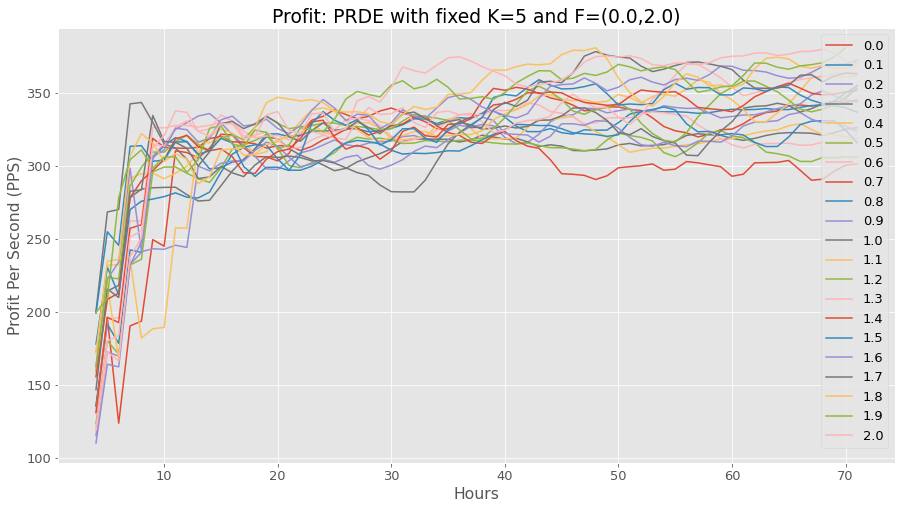

In [87]:
total_k5 = process_multiple_ppc('perfect_elastic/set_kbest_3d/set_k5_f%01.1f',0.0,2.1,0.1,
                                      'perfect_elastic/set_kbest_3d/figures/set_k5.png', 
                                      'Profit: PRDE with fixed K=5 and F=')

In [88]:
total_k5 = make_array(total_k5)

In [136]:
find_best_mean(total_k5, 0)

[299.05967207222216, 300.2885833777778, 299.3237375138889, 288.3595358083333, 296.69575800277784, 285.44575028333344, 300.15887961111116, 285.3346443388887, 291.6642551694446, 289.4726354277778, 297.4751023861111, 300.99377963611124, 307.83751748055556, 309.49079332499997, 306.9535277638889, 310.978076511111, 314.68404703888893, 317.1692456583333, 322.43733164444455, 322.0412690338029, 324.96907136388904]
20 324.96907136388904


In [92]:
plt.style.use('ggplot')
plt.rcParams["figure.figsize"] = (15,8)
plt.rcParams.update({'font.size': 13})

No handles with labels found to put in legend.


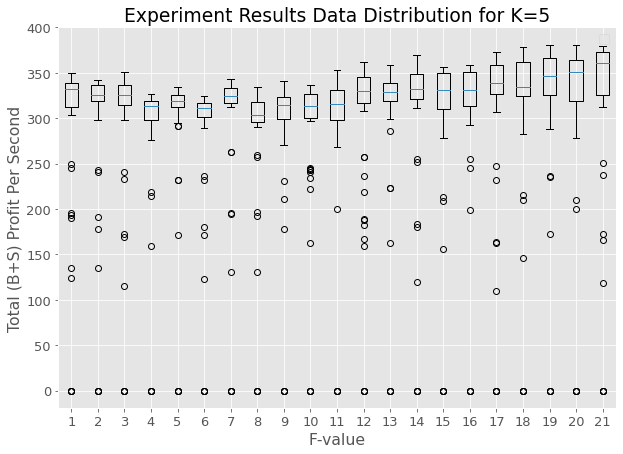

In [95]:
fig = plt.figure(figsize =(10, 7))
plt.boxplot(total_k5)
# plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9], [4, 5, 6, 7, 8, 9, 10, 11, 12])
plt.title("Experiment Results Data Distribution for K=5")
plt.ylabel("Total (B+S) Profit Per Second")
plt.xlabel("F-value")
plt.legend(loc='best')
plt.show()

20 360.31900390000015
20 360.31900390000015


[331.7298216,
 325.40665580000007,
 325.77607479999995,
 313.8190373000001,
 319.0797527,
 311.5234795,
 324.3587346,
 303.9479406999998,
 314.68517920000005,
 313.7348589999999,
 315.85562159999995,
 330.3600470000002,
 329.1106363,
 332.48895350000004,
 330.68300310000006,
 331.43412739999997,
 339.0070522,
 334.1848023,
 346.36644880000006,
 350.98892340000003,
 360.31900390000015]

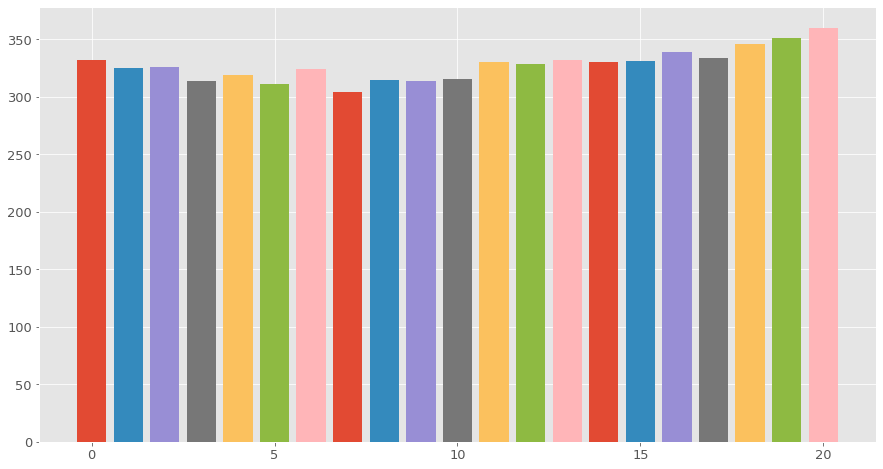

In [146]:
medians_k5 = find_best_median(total_k5, 0)
find_best_median(total_k5, 0)

In [139]:
top_n_medians(medians_k5, 3)

20 360.31900390000015
19 350.98892340000003
18 346.36644880000006


[[20, 360.31900390000015], [19, 350.98892340000003], [18, 346.36644880000006]]

In [140]:
k, p = stats.kruskal(total_k5[0], total_k5[1], total_k5[2], total_k5[3], total_k5[4] , total_k5[5],  
                     total_k5[6], total_k5[7], total_k5[8], total_k5[9], total_k5[10], total_k5[11],
                     total_k5[12], total_k5[13], total_k5[14], total_k5[15], total_k5[16], total_k5[17],
                     total_k5[18], total_k5[19], total_k5[20])
print(p)
print(format(p, '.60f'))

4.0087385869258885e-64
0.000000000000000000000000000000000000000000000000000000000000


In [143]:
import scikit_posthocs as sp
data = [total_k5[20], total_k5[19], total_k5[18]]
sp.posthoc_dunn(data, p_adjust = 'bonferroni')

,1,2,3
1,1.000000,0.077435,0.147671
2,0.077435,1.000000,1.000000
3,0.147671,1.000000,1.000000


(0            NaN
 1            NaN
 2            NaN
 3            NaN
 4     118.616945
          ...    
 67    378.510881
 68    379.943552
 69    377.273811
 70    371.873697
 71    370.114200
 Name: 0, Length: 72, dtype: float64,
 72)

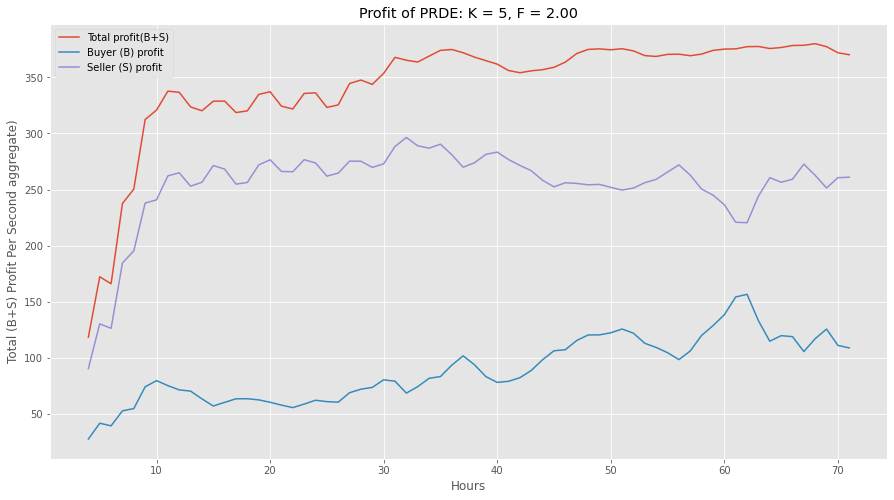

In [23]:
calculate_ppc('perfect_elastic/set_kbest_3d/set_k5_f2.0',0, "Profit of PRDE: K = 5, F = 2.0", "perfect_elastic/set_kbest_3d/figures/set_k5_f2.0.png", True)

## K = 6

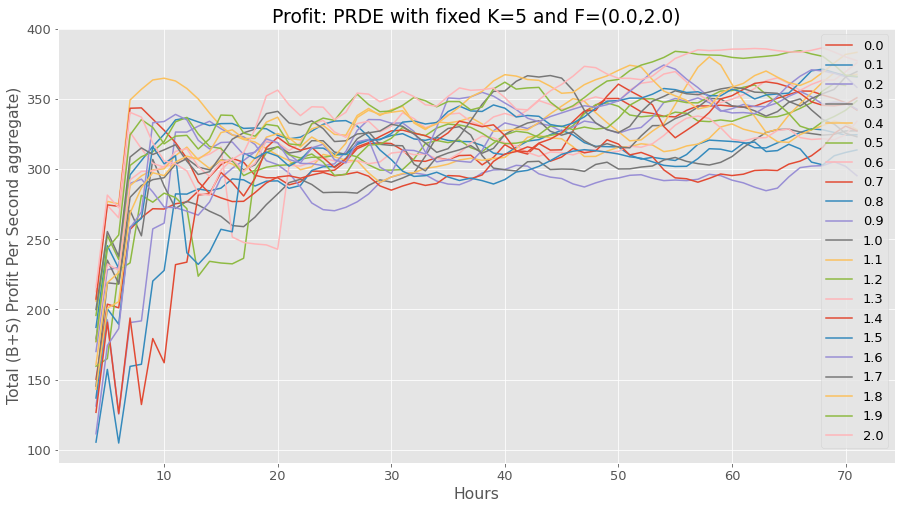

In [14]:
total_k6 = process_multiple_ppc('perfect_elastic/set_kbest_3d/set_k6_f%01.1f',0.0,2.1,0.1,
                                      'perfect_elastic/set_kbest_3d/figures/set_k6.png', 
                                      'Profit: PRDE with fixed K=5 and F=')

In [155]:
total_6k = make_array(total_k6)

20 352.8860694000001
20 352.8860694000001


[311.8476009000001,
 315.22848330000016,
 293.07508599999994,
 299.8316056,
 315.83227810000005,
 318.27422659999996,
 311.705322,
 296.38588180000005,
 311.37168080000004,
 327.19828399999994,
 316.74240499999996,
 328.6350515,
 325.7042738,
 336.6427272,
 323.5752121,
 333.39332220000006,
 336.9121693000001,
 332.4821437,
 342.4591081,
 346.96205150000003,
 352.8860694000001]

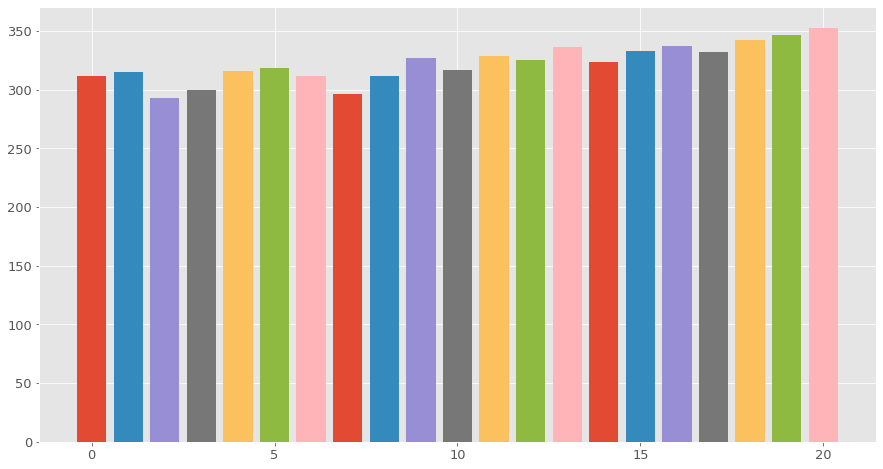

In [156]:
medians_k6 = find_best_median(total_k6, 0)
find_best_median(total_k6, 0)

In [157]:
top_n_medians(medians_k6, 3)

20 352.8860694000001
19 346.96205150000003
18 342.4591081


[[20, 352.8860694000001], [19, 346.96205150000003], [18, 342.4591081]]